# Python

FizzBuzz

In [1]:
N_from = 1
N_to = 100

In [2]:
for i in xrange(N_from, N_to + 1):
    output = ""
    if i % 3 == 0:
        output += "Fizz"
    if i % 5 == 0:
        output += "Buzz"    
    
    print output or i

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


100-th Fibonacci number

In [3]:
def Fibonacci(number):
    if number == 0:
        return 0
    if number == 1:
        return 1
    
    prev_prev_numb = 0
    prev_numb = 1
    numb = 1
    
    for _ in range(2, number):
        prev_prev_numb = prev_numb
        prev_numb = numb
        numb = prev_prev_numb + prev_numb
    
    return numb

In [4]:
print Fibonacci(100)

354224848179261915075


Quick Sort

In [5]:
import random

In [6]:
def partition(sequence):
    piv = sequence[0]
    p, q = 1, len(sequence) - 1
    
    while True:
        while p < len(sequence) and sequence[p] <= piv: p += 1
        while q > 0 and sequence[q] >  piv: q -= 1
        
        if p < q:
            sequence[p], sequence[q] = sequence[q], sequence[p]
        else:
            break
    
    return p
    
    
def qsort_list(sequence):
    if len(sequence) == 0 or len(sequence) == 1:
        return sequence    
    if len(sequence) == 2:
        if sequence[0] > sequence[1]:
            sequence[0], sequence[1] = sequence[1], sequence[0]
        return sequence
    
    r = partition(sequence)
    
    return qsort_list(sequence[1:r]) + [sequence[0]] + qsort_list(sequence[r:])

In [7]:
seq = [random.randint(-100, 100) for i in range(20)]
print seq
print qsort_list(seq)

[-42, -27, 92, 68, 67, -42, -70, 73, 41, 79, 84, -100, -47, 16, -84, -63, 65, 4, 14, 81]
[-100, -84, -70, -63, -47, -42, -42, -27, 4, 14, 16, 41, 65, 67, 68, 73, 79, 81, 84, 92]


One line qsort

In [8]:
olqs = lambda sq: [] if not sq else olqs(filter(lambda x: x <= sq[0], sq[1:])) + [sq[0]] + olqs(filter(lambda x: x > sq[0], sq[1:]))

In [9]:
print seq
print olqs(seq)

[-42, -63, -84, -47, -100, -42, -70, 73, 41, 79, 84, 67, 68, 16, 92, -27, 65, 4, 14, 81]
[-100, -84, -70, -63, -47, -42, -42, -27, 4, 14, 16, 41, 65, 67, 68, 73, 79, 81, 84, 92]


# NumPy

In [10]:
import numpy as np
import time

Linspace

In [11]:
def my_linspace_loop(start, stop, num=50):
    output = np.zeros(num);
    step = float(stop - start) / (num - 1)
    
    value = start 
    for i in np.arange(num):
        output[i] = value
        value += step
    
    return output

In [12]:
def my_linspace_lc(start, stop, num=50):
    step = float(stop - start) / (num - 1)
    
    return np.array([start + step * i for i in np.arange(num)])

In [13]:
N = 10
start = 0
finish = 10
num = 10000000

times = np.zeros((10, 3))
for i in range(N):
    start = time.time()
    np.linspace(start, finish, num)
    finish = time.time()
    times[i, 0] = finish - start
    
    start = time.time()
    my_linspace_loop(start, finish, num)
    finish = time.time()
    times[i, 1] = finish - start
    
    start = time.time()
    my_linspace_lc(start, finish, num)
    finish = time.time()
    times[i, 2] = finish - start

mean_times = times.mean(axis=0)
print "numpy time : ", mean_times[0]
print "loop  time : ", mean_times[1]
print "list comprehension time : ", mean_times[2]

numpy time :  0.0844481468201
loop  time :  2.22737698555
list comprehension time :  1.90984823704


In [14]:
times

array([[ 0.16596198,  2.28961205,  2.02755308],
       [ 0.08392787,  2.272856  ,  1.86990714],
       [ 0.07490993,  2.17798805,  1.94038606],
       [ 0.07060695,  2.228477  ,  1.89246106],
       [ 0.07224298,  2.175174  ,  1.91196895],
       [ 0.07474899,  2.27075696,  1.88692403],
       [ 0.07343197,  2.15363288,  1.818187  ],
       [ 0.07290292,  2.19808793,  1.92589903],
       [ 0.07825994,  2.31757498,  2.00077295],
       [ 0.07748795,  2.18961   ,  1.82442307]])

numpy.ndarray vs list: performance tests

In [15]:
def test_add(N, N_iter):
    times_back = np.zeros((N_iter, 2))
    
    np_arr = np.ndarray([])
    py_arr = []
    
    # Adding at the back
    for i in range(N_iter):
        start = time.time()
        for _ in range(N):
            np_arr = np.append(np_arr, np.ndarray(0))
        finish = time.time()
        times_back[i, 0] = finish - start
    
        start = time.time()
        for _ in range(N):
            py_arr.append(0)
        finish = time.time()
        times_back[i, 1] = finish - start
        
    times_front = np.zeros((N_iter, 2))
    np_arr = np.ndarray([])
    py_arr = []
        
    # Adding at the front
    for i in range(N_iter):
        start = time.time()
        for _ in range(N):
            np_arr = np.insert(np_arr, 0, 0)
        finish = time.time()
        times_front[i, 0] = finish - start
    
        start = time.time()
        for _ in range(N):
            py_arr.insert(0, 0)
        finish = time.time()
        times_front[i, 1] = finish - start
        
    times_middle = np.zeros((N_iter, 2))
    np_arr = np.ndarray([])
    py_arr = []
        
    # Adding in the middle
    for i in range(N_iter):
        start = time.time()
        for j in range(N):
            np_arr = np.insert(np_arr, j / 2, 0)
        finish = time.time()
        times_middle[i, 0] = finish - start
    
        start = time.time()
        for _ in range(N):
            py_arr.insert(j / 2, 0)
        finish = time.time()
        times_middle[i, 1] = finish - start
    
    return (times_front.mean(axis=0), times_middle.mean(axis=0), times_back.mean(axis=0))

In [16]:
print test_add(10000, 10)

(array([ 0.57067232,  0.35081656]), array([ 0.51499002,  0.32024601]), array([ 0.06202421,  0.00083106]))


# Matplotlib

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

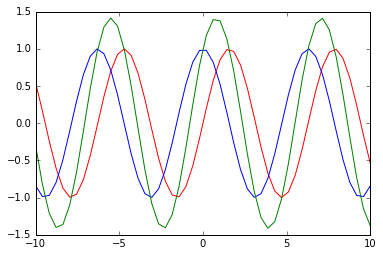

In [18]:
bound = 10
x = np.linspace(-bound,bound)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = y1 + y2
y4 = x ** 2
y5 = x ** 3

plt.plot(x,y1,'r')   
plt.plot(x,y2,'b')  
plt.plot(x,y3,'g')  

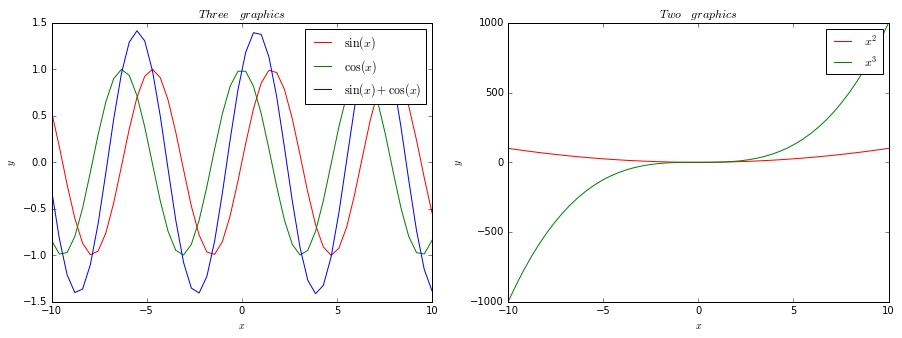

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(x, y1, 'r', label=r'$\sin(x)$')
axes[0].plot(x, y2, 'g', label=r'$\cos(x)$')
axes[0].plot(x, y3, 'b', label=r'$\sin(x)+\cos(x)$')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[0].set_title("$Three \quad graphics$")
axes[0].legend()

axes[1].plot(x, y4, 'r', label=r'$x^2$')
axes[1].plot(x, y5, 'g', label=r'$x^3$')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
axes[1].set_title("$Two \quad graphics$")
axes[1].legend()

plt.show()

In [20]:
fig.savefig("fig.pdf")

# SciPy

In [21]:
from scipy import linalg

5 x 5 matrix from normal distribution

In [22]:
norm_matrix = np.random.randn(5, 5)
norm_matrix

array([[ 1.39611442, -2.11497383,  0.04687606, -0.6277454 , -0.42084497],
       [-0.8204324 ,  1.12732884, -1.9767835 ,  1.13531112, -0.88679591],
       [ 1.20741906, -0.7319699 ,  1.131717  , -1.15187874, -0.60477194],
       [-1.41413133,  0.88680589, -0.53671238, -0.65215246,  0.14974019],
       [ 0.73173392, -1.06945473,  1.09274573, -0.90087478, -0.36981672]])

eigenvalues and eigenvectors

In [23]:
eigval, eigvec = linalg.eig(norm_matrix)

checking

In [24]:
epsilon = 1.0e-10
for egval, egvec in zip(eigval, eigvec.T):
    assert abs(norm_matrix.dot(egvec) - egval * egvec < epsilon).all()        